# 기말고사 대비요령

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [wideform, longform, stack, reset_index, melt, set_index,groupby,map, applymap,lambda,pipe, FacetGrid]

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import * 

```python
# 기본!
pd.read_csv('')
json.loads(get.requests('').text)
```

`-` 아래의 내용을 숙지하시길 바랍니다. 
- wideform / longform 
- stack(), reset_index(), melt(), set_index() 
- groupby() 
- map(), applymap(), lambda 
- pipe() 

#### map

- 같은 결과~
```python
def inc(x):return x+1
list(map(inc,[1,2,3,4]))
list(map(lambda x:x+1,[1,2,3,4]))
```
output
```
[2, 3, 4, 5]
```

`-` map 과 list comprehensions 비교

In [22]:
f=lambda x: 'X' in x
f('X1'),f('y1')

(True, False)

In [29]:
list(map(f,['X1','y1'])),[f(x) for x in ['X1','y1']]

([True, False], [True, False])

`-` 두 개의 입력 받는 함수 pow의 map과 listi comprehensions 비교

In [27]:
list(map(pow,[2,4],[4,5])),[pow(x,y) for x,y in zip([2,4],[4,5])]

([16, 1024], [16, 1024])

- 두 개 이상을 입력받는 함수를 list comprehensions에 입력하고 싶을 때 zip()으로 묶어줘야 함

In [31]:
g=[]
for i in range(5):g.append(i**2)
g,list(map(lambda x : x**2,range(5)))

([0, 1, 4, 9, 16], [0, 1, 4, 9, 16])

- lsit comprehensions와 비교하면 반복 index를 쓰지 않는 장점이 있지만, 더 제약적으로 사용할 수밖에 없다.

#### lambda [lambda:입력:출력]_5주차

`-` 기본

- 7로 같은 결과
```python
(lambda x,y: x+y)(3,4)
f=lambda x,y:x+y;f(3,4)
```

`-` lambda들의 list

In [8]:
l=[lambda x: x+1, lambda x:x+2]
for f in l:
    print(f(1))

2
3


`-` lambda들의 dictionary

In [10]:
dct={'f1':(lambda x:x+1),'f2':(lambda x:x+2)}
dct['f1'](1),dct['f2'](2)

(2, 4)

`-` lambda 조건부 입력

In [17]:
upper=lambda x,y: x if x>y else y
lower=lambda x,y: x if x<y else y
upper('a','t'),lower('a','t'),upper(3,4),lower(3,4)

('t', 'a', 4, 3)

`-` lambda expression return(lambda y:x+y 자체가 오브젝트라 가능)

In [18]:
def action(x):return (lambda y : x+y)
act=action(88)
act2=action(89)
print(act(2)),print(act2(2))

90
91


(None, None)

#### 열,행 선택

In [39]:
#collapse
dic={'X1':np.random.normal(0,1,5),
     'X2':np.random.normal(0,1,5),
     'X3':np.random.normal(0,1,5),
     'X4':np.random.normal(0,1,5)}
df=pd.DataFrame(dic)

`````python
df.X2
df['X2'] # pandas series return
df[['X2']] # dictionary return 마치 테이블처럼
df.loc[:,'X2'] # 모든 행 선택, pandas series return
df.loc[:,['X2']] # dictionary  return
df.loc[:,[False True,False]] # 불인덱싱가능(=Boolean indexing)
# 컴퓨터 과학에서 불리언(boolean) 자료형은 논리 자료형이라고도 하며, 참과 거짓을 나타내는 데 쓰인다
df.iloc[:,1] # iloc = integer loction
df.iloc[:,[1]] # iloc에서는 0이 첫번째
df.iloc[:,[False True,False]]

df[['X2','X3','X4']]
df.loc[:,['X2','X3','X4']]
df.loc[:,'X2':'X4']
df.loc[:,[False,True, True True]]
df.iloc[:,[1,2,3]]
df.iloc[:,1:]
df.iloc[:,1:3]
df.iloc[:,range(1,3)]
df.iloc[:,[False,True, True True]]
`````
`df.X2`가 단순하지만 변수 이름을 알고 있어야 하며, 변수 이름에 `마침점(.)`이나 `공백( )`이 있으면 사용할 수 없다.

In [38]:
#collapse
_df = pd.DataFrame(np.array([[1,2,3],[3,4,5],[5,6,7]]))

`````python
_df[1]
_df[[1]]
_df.loc[:,0]
_df.iloc[:,0]
_df.loc[:,[0]]
_df.iloc[:,[0]]
`````
- 열이름이 integer일 경우이다. 모두 같은 결과로 ` 선택.

In [42]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv')
# pd.Series(df.columns)
# 열 이름들 쭉 나열!

```python
df.iloc[:,list(map(lambda x: 'actor' in x,df.columns))]
df.loc[:,list(map(lambda x: 'actor' in x, df.columns))]
df.iloc[:,map(lambda x: 'actor' in x,df.columns)]
df.loc[:,map(lambda x: 'actor' in x, df.columns)]
df.loc[:,filter(lambda x: 'actor' in x, df.columns)]
# filter는 문자열로 반환해주기 때문에 iloc은 에러가 뜬다.
```
actor 라는 단어가 포함된 열만 선택
```python
df.iloc[:,list(map(lambda x: 'actor' not in x,df.columns))]
df.loc[:,list(map(lambda x: 'actor' not in x, df.columns))]
df.iloc[:,map(lambda x: 'actor' not in x,df.columns)]
df.loc[:,map(lambda x: 'actor' not in x, df.columns)]
df.loc[:,filter(lambda x: 'actor' not in x, df.columns)]
```
actor 라는 단어가 포함되지 않는 열만 선택
```python
df.iloc[:,map(lambda x: 's' ==x[-1],df.columns)]
df.loc[:,map(lambda x: 's' ==x[-1],df.columns)]
```
변수 이름이 s로 끝나는 변수들 선택 (반대는 !=)
```python
df.iloc[:,map(lambda x: 'a' != x[0],df.columns)]
df.loc[:,map(lambda x: 'a' != x[0],df.columns)]
```
변수 이름이 a로 시작하지 않는 변수들만 선택(반대는 =)
```python
df.iloc[:,map(lambda x: 'c'==x[0] or 'd'==x[0],df.columns)]
df.loc[:,map(lambda x: 'c'==x[0] or 'd'==x[0],df.columns)]
```

#### 미나드의 접근방법

In [53]:
# collapse
x=[44,48,49,58,62,68,69,70,76,79] ## 몸무게 
y=[159,160,162,165,167,162,165,175,165,172] ## 키
g= 'f','f','f','f','m','f','m','m','m','m'
df=pd.DataFrame({'w':x,'h':y,'g':g})

<AxesSubplot:xlabel='w', ylabel='h'>

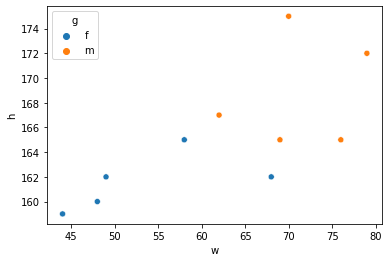

In [56]:
sns.scatterplot(data=df,x='w',y='h',hue='g')

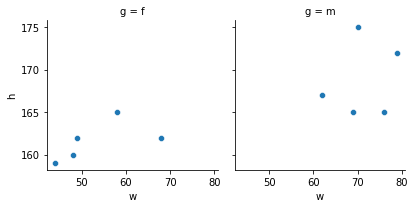

In [57]:
figs = sns.FacetGrid(df,col='g') # 다중 그래프 그릴때 많이 사용됨
figs.map (sns.scatterplot,'w','h') 

In [64]:
df1=df.query("g =='f'")[['w','h']] ## 여성.csv 
df2=df.query("g =='m'")[['w','h']] ## 남성.csv 
# pd.concat([df1,df2],keys=['f','m']).reset_index().iloc[:,[0,2,3]].rename(columns={'level_0':'g'})
# 열 이어 붙이기!

`-` ggplot을 이용한 고난도 문제가 출제될 수 있습니다. 

In [ ]:
# collapse
mpg=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/mpg.csv')

`-` pandas backend를 이용한 plot은 아주 잘 숙지하고 계셔야합니다. 